# Debt rule

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Debt rule](#toc2_)    
- 3. [Two-asset model](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["NUMBA_PARFOR_MAX_TUPLE_SIZE"] = "200"
from copy import deepcopy

import numpy as np
import pandas as pd
import numba as nb
nb.set_num_threads(4)

import matplotlib.pyplot as plt

import figs
from IHANKModel import HANKModelClass, create_model, copies

In [2]:
pardicts = [{'debt_rule':True,'epsB':0.10}]

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [3]:
model_HANK = create_model(name='HANK', par={'HH_type':'HA'})

HANK


## 2. <a id='toc2_'></a>[Debt rule](#toc0_)

In [4]:
models = copies(model_HANK,pardicts)

{'debt_rule': True, 'epsB': 0.1}


In [5]:
paths = ['GDP','C','tau','B']
paths_full = figs.paths_defaults['standard'] + ['tau']
labels =  ['$\epsilon^B = 0$ (initially)'] + [f'$\epsilon^B$ = {model.par.epsB:.2f}' for model in models[1:]]

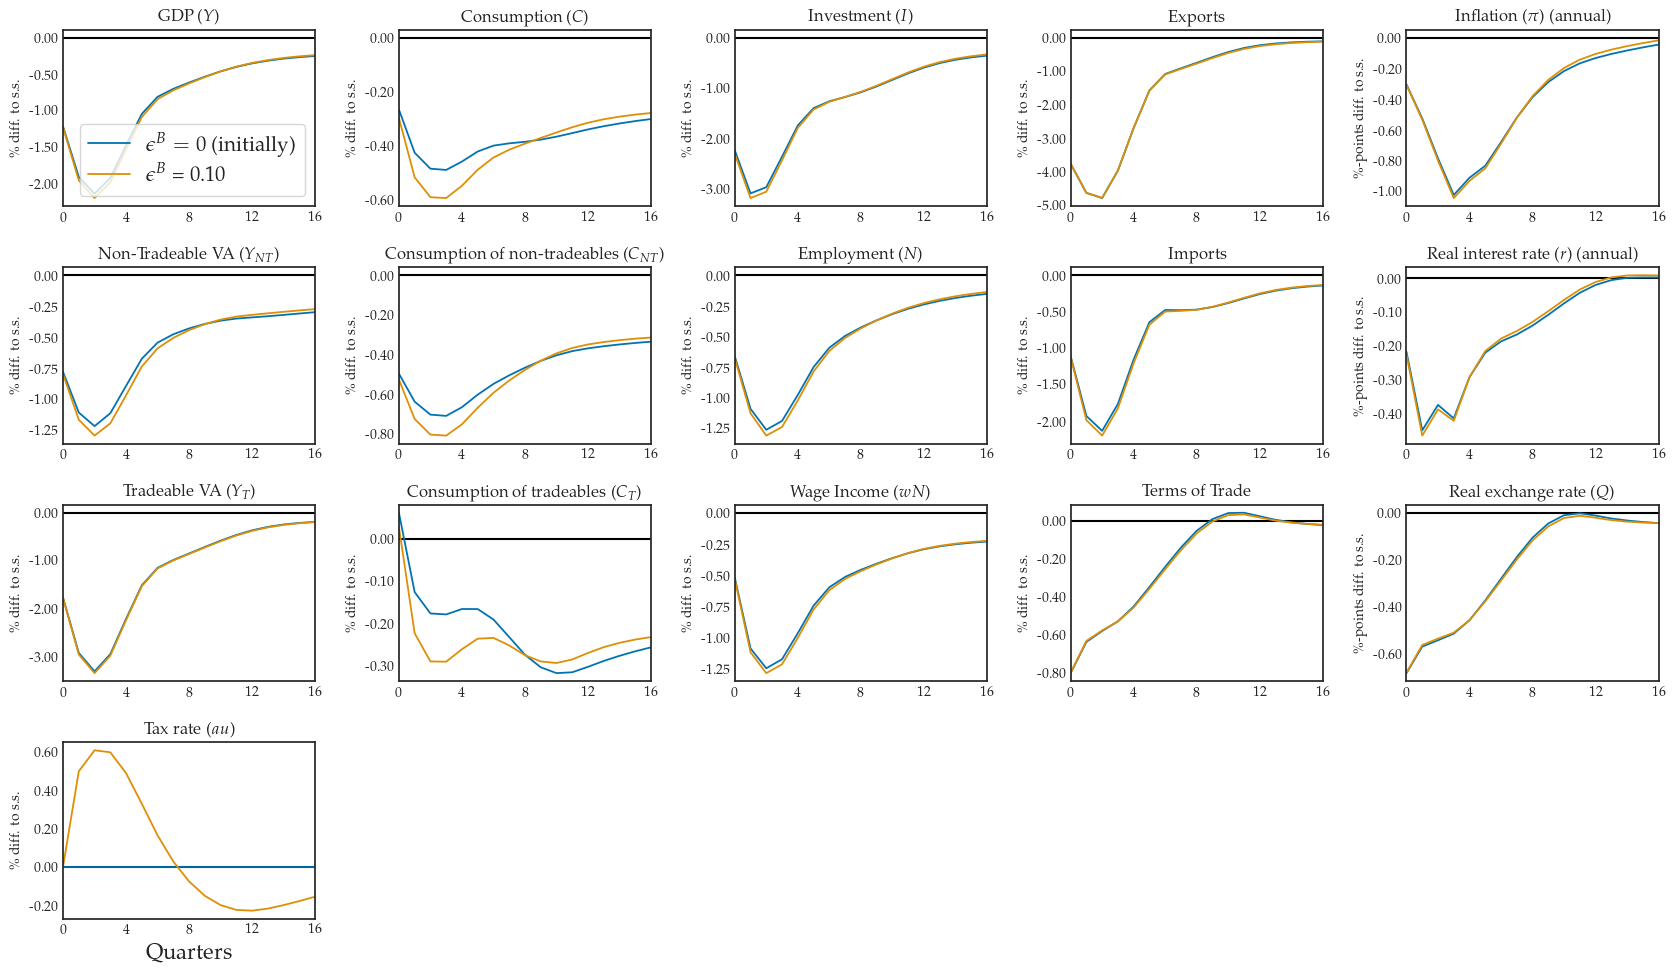

In [6]:
fig = figs.show_IRFs(models=models,paths=paths_full,labels=labels,figsize=[3.4,2.5]) 

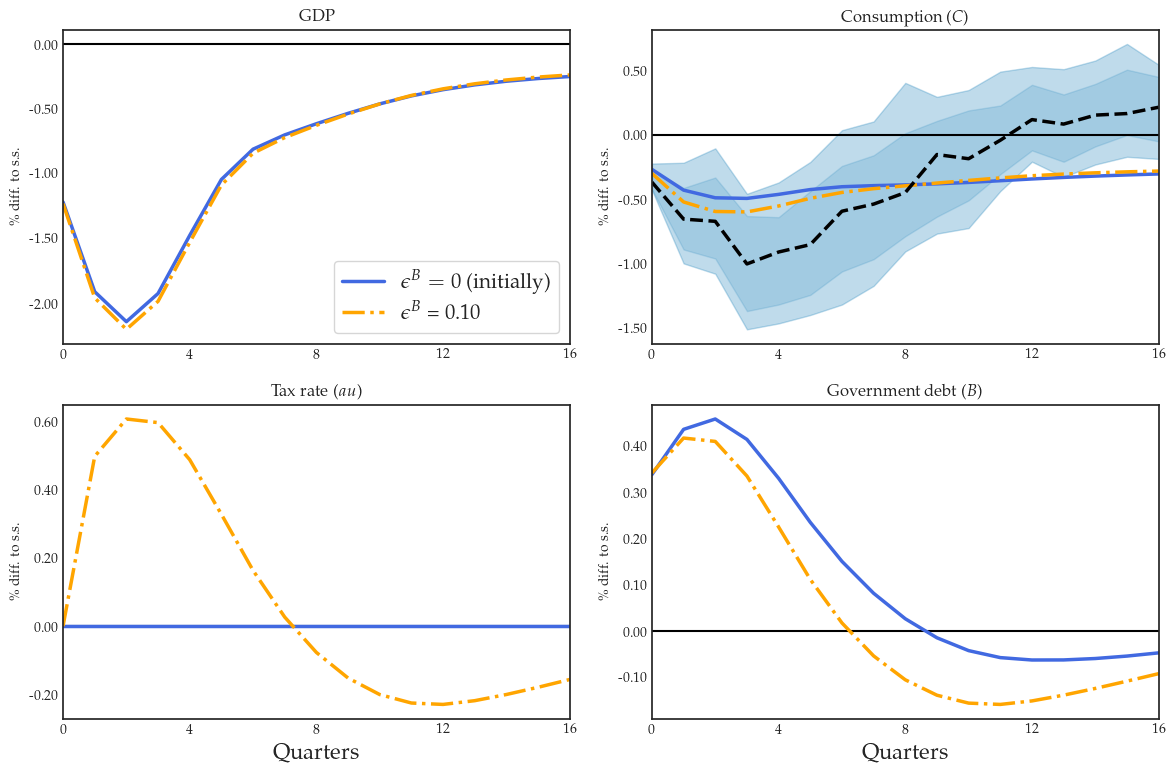

In [7]:
fig = figs.show_IRFs_vs_data(models=models,paths=paths,labels=labels,maxcol=2,figsize=[6,4],data=models[0].data)
fig.savefig('plots/Debt_rule_IRFs.pdf')

# Fixed exchange rate

In [8]:
model_HANK_fixed = create_model(name='HANK_fixed', par={'HH_type':'HA','floating':False})
models_fixed = copies(model_HANK_fixed,pardicts)

HANK_fixed


{'debt_rule': True, 'epsB': 0.1}


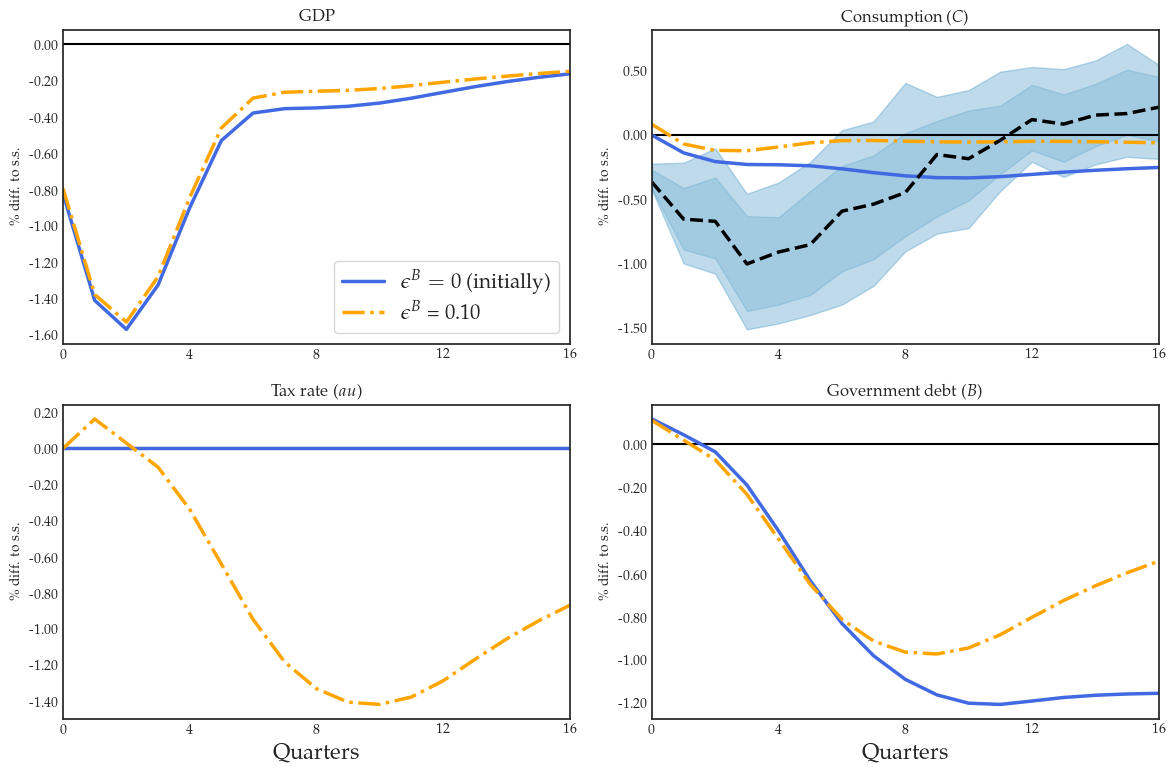

In [9]:
fig = figs.show_IRFs_vs_data(models=models_fixed,paths=paths,labels=labels,maxcol=2,figsize=[6,4],data=models[0].data)
fig.savefig('plots/Debt_rule_IRFs_fixed.pdf')

## 3. <a id='toc3_'></a>[Two-asset model](#toc0_)

In [10]:
# model_HANK2A = create_model(name='HA-2A',par={'HH_type':'HA-2A'})

In [11]:
# models_2A = copies(model_HANK2A,pardicts)

In [12]:
# fig = figs.show_IRFs(models=models_2A,paths=paths_full,labels=labels,figsize=[3.4,2.5])
# fig.savefig('plots/Debt_rule_2A_IRFs.pdf')

In [13]:
# fig = figs.show_IRFs_vs_data(models=models_2A,paths=paths,labels=labels,maxcol=2,figsize=[6,4],data=models[0].data)
# fig.savefig('plots/Debt_rule_2A_IRFs.pdf')